In [150]:
import requests
from bs4 import BeautifulSoup
import bs4
import re
import pandas as pd
import seaborn as sns
import matplotlib as plt
sns.set()
%matplotlib inline

In [15]:
url = "http://budzu.com/prices"
r = requests.get(url,'html')
#r.text

In [16]:
# c = r.content
c = r.text

# soup = BeautifulSoup(c,"html.parser")
soup = BeautifulSoup(c,"lxml")

#print(soup.prettify())

In [17]:
todos = soup.find_all("div",{"class":"col-md-2"})

In [18]:
stateURLs = []
cityURLs = []

In [19]:
for todo in todos:
    ulLists = todo.find_all("ul",{})
    #print(ulLists)
    for ulList in ulLists:
        liLists = ulList.find_all('li',{})
        #print(liLists)
        for liList in liLists:
            ahrefs = liList.find('a',href=True)
            #print(ahrefs['href'])
#             print(ahrefs.text)
            stateURLs.append(ahrefs['href'])

In [20]:
len(stateURLs)

50

In [21]:
for stateURL in stateURLs:
    req = requests.get(stateURL,'html')
    con = req.text
    soup = BeautifulSoup(con,"lxml")
    stateTodos = soup.find_all("div",{"class":"col-md-10"})
#     print(stateTodos)
    
    
    for stateTodo in stateTodos:
        liCityLists = stateTodo.find_all("li",{})
#         print(liCityLists)
        for liCityList in liCityLists:
            cityHref = liCityList.find('a',href=True)
#             print(cityHref['href'])
            cityURLs.append(cityHref['href'])

In [22]:
len(cityURLs)


1603

In [23]:
import csv

with open("cityURL.csv","w") as output:  # open("output.csv","wb") for Python 2
    writer = csv.writer(output, lineterminator='\n')
    for val in cityURLs:
        writer.writerow([val])

In [24]:
infoList = []
for cityURL in cityURLs:
    reqCity = requests.get(cityURL,'html')
    conCity = reqCity.text
    soup = BeautifulSoup(conCity,"lxml")
    cityTodos = soup.find_all("table",{'id':'usa-latest-table'})
#     print(cityTodos)
    
    for cityTodo in cityTodos:
#         print(cityTodo.find_all('tbody',{}))
        tbodyLists = cityTodo.find_all('tbody',{})
        for tbodyList in tbodyLists:
#             print(tbodyList.find_all('tr',{}))
            trLists = tbodyList.find_all('tr',{})
            for trList in trLists:
                d = {}
#                 print(trList.find_all('td',{'style':'text-align: center; '}))
#                 print(len(trLists))
                tdLists = trList.find_all('td',{'style':'text-align: center; '})
#                 print(tdLists[0].text)
                try:
                    d["City"] = tdLists[1].text
                    print(tdLists[1].text)

                    d["Price"] = tdLists[2].text
    #                 print(tdLists[2].text)

                    d["Size"] = tdLists[3].text
    #                 print(tdLists[3].text)

                    score = tdLists[4].find('div',{'class':'raty-submission'})
    #                 print(score['data-score'])
    #                 print(score)
                    d["Quality"] =score['data-score']

                    d["Strain"] = tdLists[5].text
    #                 print(tdLists[5].text)
    #                 print(tdLists[6].text)

                    d["Date"] = tdLists[7].text
    #                 print(tdLists[7].text)
    #                 print("==================================")
                    infoList.append(d)
                except:
                    pass
    reqCity = None

Alabaster (AL) 
Albertville (AL) 
Albertville (AL) 
Anniston (AL) 
Anniston (AL) 
Athens(AL) 
Athens (AL) 
Athens (AL) 
Athens (AL) 
Athens (AL) 
Athens(AL) 
Athens (AL) 
Athens (AL) 
Athens (AL) 
Athens (AL) 
Auburn (AL) 
Auburn (AL) 
Auburn (AL) 
Auburn (AL) 
Auburn (AL) 
Bessemer (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Birmingham (AL) 
Center Point (AL) 
Center Point (AL) 
Cullman (AL) 
Cullman (AL) 
Cullman (AL) 
Dothan (AL) 
Florence (AL) 
Florence (AL) 
Florence (AL) 
Florence(AL) 
Florence (AL) 
Florence (AL) 
Florence (AL) 
Florence (AL) 
Florence (AL) 
Florence (AL) 
Foley (AL) 
Fort Payne (AL) 
Fort Payne (AL) 
Fort Payne (AL) 
Gadsden (AL) 
Gadsden (AL) 
Gadsden (AL) 
Gadsden (AL) 
Hueytown (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville (AL) 
Huntsville 

Davis (CA) 
Desert Hot Springs (CA) 
Dinuba (CA) 
Dublin (CA) 
Dublin (CA) 
Dublin (CA) 
Dublin (CA) 
El Centro (CA) 
Elk Grove (CA) 
El Monte (CA) 
El Monte (CA) 
Escondido (CA) 
Escondido (CA) 
Escondido (CA) 
Escondido (CA) 
Fairfield (CA) 
Fairfield (CA) 
Fairfield (CA) 
Fairfield (CA) 
Fontana (CA) 
Fontana (CA) 
Fontana (CA) 
Fortuna (CA) 
Fremont (CA) 
Fremont (CA) 
Fremont (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fresno (CA) 
Fullerton (CA) 
Fullerton (CA) 
Galveston (CA) 
Gallatin (CA) 
Galveston (CA) 
Galt (CA) 
Galveston (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendale (CA) 
Glendora (CA) 
Goleta (CA) 
Grass Valley (CA) 
Grass Valley (CA) 
Hanford (CA) 
Hawaiian Gardens(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Hayward(CA) 
Haywa

Walnut Creek (CA) 
West Hollywood (CA) 
Westminster (CA) 
Westminster (CA) 
Westminster (CA) 
Westminster (CA) 
Westminster (CA) 
Westminster (CA) 
Whittier (CA) 
Whittier (CA) 
Whittier (CA) 
Woodland (CA) 
Woodland (CA) 
Yuba City (CA) 
Yuba City (CA) 
Yuba City (CA) 
Yuba City (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Yucaipa (CA) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Aurora (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Boulder (CO) 
Canon City (CO) 
Canon City (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Colorado Springs (CO) 
Commerce City (CO) 
Denver (CO) 
Denver (CO) 
Denver (CO) 
Denver (CO) 
Denver (C

Oakland Park(FL) 
Ocala (FL) 
Ocala (FL) 
Ocala (FL) 
Ocala (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Orlando (FL) 
Ormond Beach (FL) 
Ormond Beach (FL) 
Oviedo (FL) 
Palm Bay (FL) 
Palm Bay (FL) 
Palm Bay (FL) 
Palm Bay (FL) 
Palm Bay (FL) 
Palm Bay (FL) 
Palm Beach Gardens(FL) 
Palm Beach Gardens(FL) 
Palm Beach Gardens(FL) 
Palm Beach Gardens(FL) 
Palm Coast (FL) 
Panama City (FL) 
Panama City Beach (FL) 
Panama City Beach (FL) 
Pembroke Pines (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Pensacola (FL) 
Plantation (FL) 
Plantation (FL) 
Pompano Beach (FL) 
Port St. Lucie (FL) 
Port St. Lucie (FL) 
Port St. Lucie (FL) 
Port St. Lucie (FL) 
Riviera Beach (FL) 
Riviera Beach (FL) 
Rockledge (FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sarasota(FL) 
Sat

Homewood(IL) 
Homewood(IL) 
Homewood(IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Jacksonville (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Joliet (IL) 
Kankakee (IL) 
Kankakee (IL) 
Kankakee (IL) 
Kankakee (IL) 
Kankakee (IL) 
La Grange(IL) 
LaGrange (IL) 
Lake Forest (IL) 
Lake Forest (IL) 
Lake Forest (IL) 
Lake Forest (IL) 
Lake Zurich(IL) 
Lansing (IL) 
Lansing (IL) 
Lansing (IL) 
Lansing (IL) 
Lansing (IL) 
Lansing(IL) 
Lansing(IL) 
Lansing (IL) 
Lansing (IL) 
Lansing (IL) 
Lemont(IL) 
Clermont (IL) 
Lemont(IL) 
Libertyville(IL) 
Lombard(IL) 
Lombard(IL) 
Lombard(IL) 
Lombard(IL) 
Lombard(IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Marion (IL) 
Mattoon (IL) 
Mattoon (IL) 
Melrose Park(IL) 
Melrose Park(IL) 
Minooka(IL) 
Minooka(IL) 
Mok

Overland Park (KS) 
Overland Park (KS) 
Overland Park (KS) 
Overland Park (KS) 
Overland Park (KS) 
Salina (KS) 
Salina (KS) 
Salinas (KS) 
Salinas (KS) 
Salinas (KS) 
Salinas (KS) 
Salina (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Topeka (KS) 
Wichita (KS) 
Wichita (KS) 
Wichita Falls (KS) 
Wichita Falls (KS) 
Wichita Falls (KS) 
Wichita Falls (KS) 
Wichita (KS) 
Wichita (KS) 
Wichita (KS) 
Wichita Falls (KS) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Ashland (KY) 
Berea (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Bowling Green (KY) 
Covington (KY) 
Covington (KY) 
Covington (KY) 
Elizabethtown (KY) 
Florence (KY) 
Florence (KY) 
Florence (KY) 
Florence(KY) 
Florence (KY) 
Florence (KY) 
Florence (KY) 
Florence (KY) 
Florence (KY) 
Flore

Taunton (MA) 
Taunton (MA) 
Taunton (MA) 
Taunton (MA) 
Taunton (MA) 
Taunton (MA) 
Waltham (MA) 
West Springfield (MA) 
West Springfield (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Worcester (MA) 
Adrian (MI) 
Alpena (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Ann arbor (MI) 
Battle Creek (MI) 
Benton Harbor (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Birmingham (MI) 
Coldwater (MI) 
Dearborn Heights (MI) 
Dearborn (MI) 
Dearborn Heights (MI) 
Dearborn Heights (MI) 
Dearborn Heights (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
Detroit (MI) 
East Lansing (MI) 
Eastpointe (MI) 
Es

Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kansas City (MO) 
Kennett (MO) 
Kennett (MO) 
Kirksville (MO) 
Lee's Summit (MO) 
Liberty (MO) 
Liberty (MO) 
Liberty (MO) 
Libertyville(MO) 
Liberty (MO) 
Maryland Heights (MO) 
Marysville (MO) 
Marysville(MO) 
Marysville(MO) 
Maryville (MO) 
Maryville (MO) 
Maryville (MO) 
Marysville (MO) 
Marysville (MO) 
Nixa (MO) 
Ozark (MO) 
Ozark (MO) 
Poplar Bluff (MO) 
Poplar Bluff (MO) 
Poplar Bluff (MO) 
Republic (MO) 
Greenwood Village (MO) 
Rolling Meadows (MO) 
Rolling Meadows (MO) 
Rolla (MO) 
Sikeston (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
Springfield (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St. Charles (MO) 
St

Ithaca (NY) 
Jamestown (NY) 
Jamestown (NY) 
Kingston(NY) 
Kingston (NY) 
Lake Grove(NY) 
Lindenhurst(NY) 
Lindenhurst(NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Long Beach (NY) 
Massapequa Park(NY) 
Massapequa Park(NY) 
Massapequa Park(NY) 
Middletown (NY) 
Middletown (NY) 
Middletown (NY) 
Middletown (NY) 
Middletown (NY) 
Middletown (NY) 
Middletown (NY) 
Middletown(NY) 
Middletown(NY) 
Newburgh (NY) 
Newburgh (NY) 
Newburgh (NY) 
Newburgh (NY) 
Newburgh (NY) 
New Rochelle (NY) 
New Rochelle (NY) 
New Rochelle (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
New York (NY) 
Niagara Falls (NY) 
Niagara Falls(NY) 
Niagara Falls(NY) 
Niagara Falls(NY) 
Oneonta (NY) 
Oneonta (NY) 
Oswego (NY) 
Oswego (NY) 
Oswego (NY) 
Oswego (NY) 
Oswego (NY) 
Patchogue(NY) 
Peekskill (NY) 
Plattsbur

East Cleveland (OH) 
Elyria (OH) 
Elyria (OH) 
Euclid (OH) 
Euclid (OH) 
Fairborn (OH) 
Fairfield (OH) 
Fairfield (OH) 
Fairfield (OH) 
Fairfield (OH) 
Gahanna (OH) 
Gahanna (OH) 
Greenville (OH) 
Greenville (OH) 
Greenwood Village (OH) 
Greenville (OH) 
Greenville (OH) 
Greenville (OH) 
Greenville (OH) 
Greenville (OH) 
Greenville (OH) 
Greenville (OH) 
Hamilton(OH) 
Hamilton(OH) 
Hamilton(OH) 
Hamilton (OH) 
Hamilton (OH) 
Hilliard (OH) 
Huber Heights (OH) 
Huber Heights (OH) 
Huber Heights (OH) 
Huber Heights (OH) 
Huber Heights (OH) 
Kent (OH) 
Kennett (OH) 
Kent (OH) 
Kent (OH) 
Rockville Centre(OH) 
Rockville Centre(OH) 
Rockville Centre(OH) 
Kennett (OH) 
Kent (OH) 
Kent (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lakewood (OH) 
Lebanon (OH) 
Lebanon (OH) 
Lebanon (OH) 
Lebanon (OH) 
Lebanon (OH) 
Rolling Meadows (OH) 
Rolling Meadows (OH) 
Lima (OH) 
Lima (OH) 
Lima (OH) 
Lima (OH) 
Lima (OH) 
Colorado Springs (

Oil City (PA) 
Oil City (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Philadelphia (PA) 
Phoenixville(PA) 
Phoenixville(PA) 
Phoenixville(PA) 
Phoenixville(PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pittsburgh (PA) 
Pottstown(PA) 
Reading (PA) 
Scranton (PA) 
Scranton (PA) 
Scranton (PA) 
Scranton (PA) 
State College(PA) 
State College(PA) 
State College(PA) 
State College(PA) 
State College(PA) 
Uniontown (PA) 
Uniontown (PA) 
West Chester(PA) 
West Chester(PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Wilkes-Barre (PA) 
Williamsport (PA) 
Williamsport (PA) 
New York (PA) 
New York (PA) 
New York (PA) 
New York (PA) 
New York (PA) 
New York (PA) 
New Yo

El Campo (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
El Paso (TX) 
Flower Mound(TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
Fort Worth (TX) 
San Francisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
Frisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
San Francisco (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Gainesville (TX) 
Galveston (TX) 
Galveston (TX) 
Galveston (TX) 
Garland (TX) 
Garland (TX) 
Garland (TX) 
Garland (TX) 
Garland (TX) 
Georgetown (TX) 
Grand Prairie (TX) 
Grand Prairie (TX) 
Grand Prairie (TX) 
Grand Prairie (TX) 
Grand Prairie (TX) 
Greenville (TX) 
Greenville (TX) 
Greenwood Village (TX) 
Greenville (TX) 
Greenville

Radford (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Richmond (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Roanoke (VA) 
Suffolk (VA) 
Vienna(VA) 
Vienna(VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Virginia Beach (VA) 
Waynesboro (VA) 
Williamsburg (VA) 
Williamsburg (VA) 
Williamsburg (VA) 
Winchester (VA) 
Winchester (VA) 
Winchester (VA) 
Winchester (VA) 
Aberdeen (WA) 
Aberdeen (WA) 
Aberdeen (WA) 
Arlington (WA) 
Arlington (WA) 
Arlington (WA) 
Arlington Heights(WA) 
Arlington(WA) 
Arlington (WA) 
Arlington(WA) 
Arlington (WA) 
Arlington (WA) 
Arlington Heights(WA) 
Auburn (WA) 
Auburn (WA) 
Auburn (WA) 
Auburn (WA) 
Auburn (WA) 
Bellevue (WA) 
Bellevue 

In [25]:
import pandas
df = pandas.DataFrame(infoList)

In [26]:
df

,City,Date,Price,Quality,Size,Strain
0,Alabaster (AL),"June 17, 2015",$ 90,3.0,14g(1/2oz),303 Kush
1,Albertville (AL),"December 29, 2016",$ 10,3.0,1g,OG Kush
2,Albertville (AL),"August 25, 2016",$ 12,3.0,2g,Jack Flash
3,Anniston (AL),"June 17, 2015",$ 100,3.0,14g(1/2oz),Girl Scout Cookies
4,Anniston (AL),"May 13, 2015",$ 60,3.0,14g(1/2oz),Girl Scout Cookies
5,Athens(AL),"February 03, 2018",$ 15,4.5,1g,purp
6,Athens (AL),"December 23, 2017",$ 25,5.0,2g,bubblegum
7,Athens (AL),"December 18, 2017",$ 10,3.5,1g,.??
8,Athens (AL),"November 01, 2017",$ 10,3.5,1g,Black diamond
9,Athens (AL),"October 12, 2017",$ 5,3.5,1g,Gelato


In [27]:
df.to_csv("OutPut.csv")

In [126]:
dataFrame = pd.read_csv('OutPut.csv', encoding = "ISO-8859-1")

In [127]:
dataFrame.head()

,Unnamed: 0,City,Date,Price,Quality,Size,Strain
0,0,Alabaster (AL),17-Jun-15,$90,3.0,14g(1/2oz),303 Kush
1,1,Albertville (AL),29-Dec-16,$10,3.0,1g,OG Kush
2,2,Albertville (AL),25-Aug-16,$12,3.0,2g,Jack Flash
3,3,Anniston (AL),17-Jun-15,$100,3.0,14g(1/2oz),Girl Scout Cookies
4,4,Anniston (AL),13-May-15,$60,3.0,14g(1/2oz),Girl Scout Cookies


In [128]:
dataFrame.drop('Unnamed: 0', axis=1, inplace=True)

In [129]:
dataFrame.head()

,City,Date,Price,Quality,Size,Strain
0,Alabaster (AL),17-Jun-15,$90,3.0,14g(1/2oz),303 Kush
1,Albertville (AL),29-Dec-16,$10,3.0,1g,OG Kush
2,Albertville (AL),25-Aug-16,$12,3.0,2g,Jack Flash
3,Anniston (AL),17-Jun-15,$100,3.0,14g(1/2oz),Girl Scout Cookies
4,Anniston (AL),13-May-15,$60,3.0,14g(1/2oz),Girl Scout Cookies


In [130]:
def extractNum (str):
    # if str contains no g, extract the number
    # multiply it with 28.3495 to convert oz to gm
    if 'g' not in str:
        num = float(re.findall('\d+',str)[0])
        return num*28.3495 
    # else just extract the number
    else:
        num = float(re.findall('\d+',str)[0])
        return num

In [131]:
dataFrame['Size in gm'] = dataFrame['Size'].apply(lambda x: extractNum(x))

In [132]:
def getState(str):
    return re.findall('([^\W]+)',str)[-1]

In [133]:
dataFrame['State'] = dataFrame['City'].apply(lambda x: getState(x))

In [134]:
def getCity(str):
    regex = re.findall('([^\W]+)',str)
    city=''
    for k in range(len(regex)-1):
        city += regex[k]+' '
    return city.rstrip()

In [135]:
dataFrame['City'] = dataFrame['City'].apply(lambda x: getCity(x))

In [136]:
dataFrame['Price'] = dataFrame['Price'].apply(lambda x: float(re.findall('([^\W]+)',x)[0]))

In [137]:
dataFrame['Price per gm'] = dataFrame['Price'] / dataFrame['Size in gm']

In [140]:
dataFrame.head()

,City,Date,Price,Quality,Size,Strain,Size in gm,State,Price per gm
0,Alabaster,17-Jun-15,90.0,3.0,14g(1/2oz),303 Kush,14.0,AL,6.428571
1,Albertville,29-Dec-16,10.0,3.0,1g,OG Kush,1.0,AL,10.000000
2,Albertville,25-Aug-16,12.0,3.0,2g,Jack Flash,2.0,AL,6.000000
3,Anniston,17-Jun-15,100.0,3.0,14g(1/2oz),Girl Scout Cookies,14.0,AL,7.142857
4,Anniston,13-May-15,60.0,3.0,14g(1/2oz),Girl Scout Cookies,14.0,AL,4.285714


In [141]:
dataFrame.to_csv("OutPut_Cleaned.csv")

In [154]:
dfByState = dataFrame.groupby('State')

In [160]:
dfByState.describe().head()

Price                                                          \
       count        mean         std  min   25%   50%     75%    max   
State                                                                  
AK      32.0  107.468750  100.012252  2.0  17.5  80.0  181.25  296.0   
AL     111.0  103.351351  190.164457  1.0  13.5  20.0  100.00  950.0   
AR      89.0   67.078652  109.426836  1.0  10.0  19.0   45.00  600.0   
AZ     129.0   75.286822  108.504550  1.0  10.0  20.0  100.00  650.0   
CA     701.0   75.082739  144.299199  1.0  10.0  20.0   80.00  950.0   

      Price per gm              ...    Quality      Size in gm             \
             count       mean   ...        75%  max      count       mean   
State                           ...                                         
AK            32.0  11.091284   ...      3.125  5.0       32.0  26.924750   
AL           111.0  11.808112   ...      4.000  5.0      111.0  62.948541   
AR            89.0  12.374737   ...      4.000  5.0       89.0  38.397169   
AZ           129.0  10.365002   ...      3.500  5.0      129.0  48.920202   
CA           701.0   8.759442   ...      4.000  5.0      701.0  83.249715   

                                                  
              std  min  25%   50%   75%      max  
State                                             
AK      78.834975  1.0  1.0  10.5  28.0  453.592  
AL     141.280479  1.0  1.0   3.0  28.0  453.592  
AR     113.754268  1.0  1.0   1.0  14.0  453.592  
AZ     126.252854  1.0  1.0   3.0  28.0  453.592  
CA     161.453816  1.0  1.0   3.0  28.0  453.592  

[5 rows x 32 columns]

In [166]:
dfStateMedian = dfByState.median()

In [171]:
dfStateMedian.drop('Price', axis=1, inplace=True)

In [172]:
dfStateMedian

,Quality,Size in gm,Price per gm
State,,,
AK,3.00,10.5,10.000000
AL,3.00,3.0,11.607143
AR,3.00,1.0,11.428571
AZ,3.00,3.0,10.000000
CA,3.00,3.0,10.000000
CO,3.00,3.0,10.000000
CT,3.00,3.0,11.428571
DE,3.00,7.0,10.714286
FL,3.00,3.0,10.000000


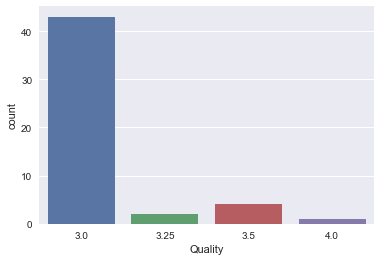

In [174]:
sns.countplot(dfStateMedian['Quality'])

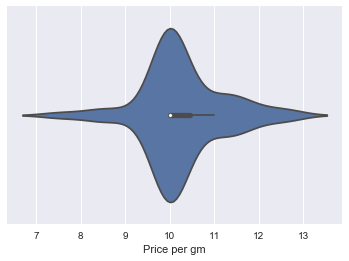

In [180]:
sns.violinplot(dfStateMedian['Price per gm'])